In [1]:
#Just youtube recommended me this video and i decided to try  it out 

In [10]:
import cv2
import numpy as np

def cartoonify_image(image_path, output_path):
    # Load the image
    image = cv2.imread("lena.png")
    if image is None:
        print("Error: Unable to load image.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply median blur to reduce noise and smooth the image
    gray = cv2.medianBlur(gray, 5)

    # Detect edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

    # Apply bilateral filter to smooth the image while keeping edges sharp
    color = cv2.bilateralFilter(image, 9, 300, 300)

    # Combine the edges mask with the smoothed image
    cartoon = cv2.bitwise_and(color, color, mask=edges)

    # Save the cartoonified image
    cv2.imwrite(output_path, cartoon)
    print(f"Cartoonified image saved to {output_path}")

    # Display the original and cartoonified images
    cv2.imshow("Original Image", image)
    cv2.imshow("Cartoonified Image", cartoon)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    # Input and output file paths
    input_image_path = "input_image.jpg"  # Replace with your input image path
    output_image_path = "cartoonified_image.jpg"  # Replace with your desired output image path

    # Cartoonify the image
    cartoonify_image(input_image_path, output_image_path)

Cartoonified image saved to cartoonified_image.jpg


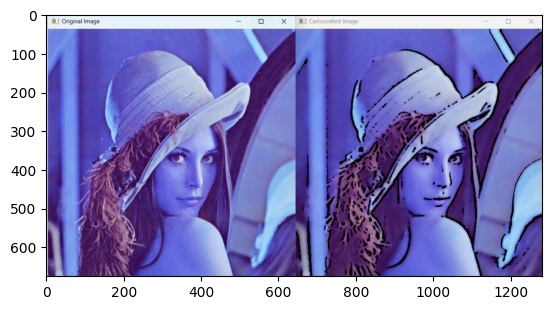

In [13]:
import matplotlib.pyplot as plt
image=cv2.imread("First.png")
plt.imshow(image)

In [14]:
# Not to satisfied

Image loaded successfully!
Cartoonification complete!


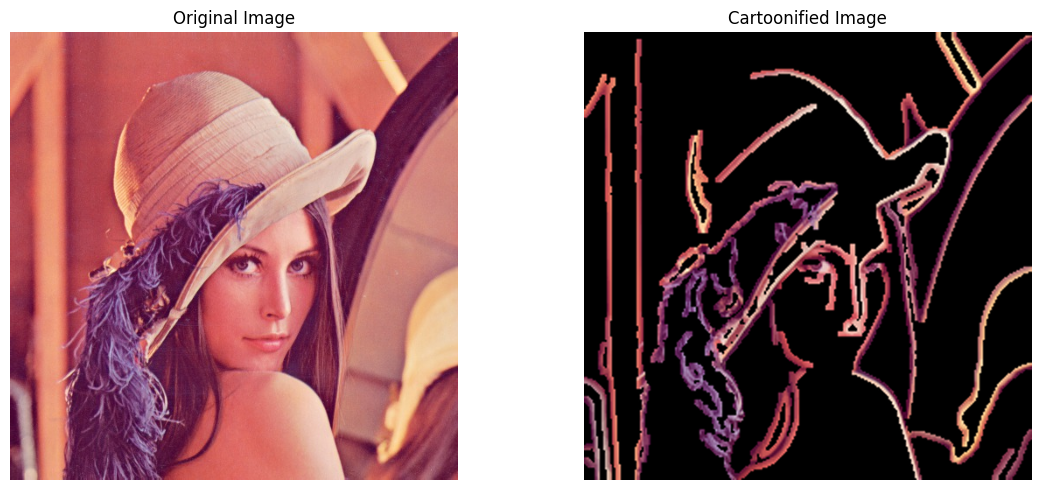

Cartoon saved to cartoon_output.jpg


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Above line ensures plots display in the notebook

class NotebookCartoonifier:
    def __init__(self, image_path):
        """Initialize with image path."""
        self.image_path = "lena.png"
        self.image = None
        self.cartoon = None
        
    def load_image(self):
        """Load the image with error handling."""
        try:
            self.image = cv2.imread(self.image_path)
            if self.image is None:
                raise ValueError(f"Failed to load image from {self.image_path}. Check path and format.")
            print("Image loaded successfully!")
            return True
        except Exception as e:
            print(f"Error: {str(e)}")
            return False

    def cartoonify(self, downscale_factor=2, bilateral_d=9, sigma_color=9, 
                  sigma_space=7, edge_threshold1=50, edge_threshold2=150):
        """
        Convert loaded image to cartoon style.
        Parameters are adjustable for different effects.
        """
        if self.image is None:
            print("No image loaded. Call load_image() first.")
            return False

        try:
            # Get original dimensions
            height, width = self.image.shape[:2]
            
            # Downscale for processing
            small_img = cv2.resize(self.image, 
                                 (width // downscale_factor, height // downscale_factor),
                                 interpolation=cv2.INTER_AREA)

            # Bilateral filter for smooth colors
            num_bilateral = 3
            color_filtered = small_img.copy()
            for _ in range(num_bilateral):
                color_filtered = cv2.bilateralFilter(
                    color_filtered,
                    d=bilateral_d,
                    sigmaColor=sigma_color,
                    sigmaSpace=sigma_space
                )

            # Edge detection
            gray = cv2.cvtColor(small_img, cv2.COLOR_BGR2GRAY)
            gray_blur = cv2.medianBlur(gray, 7)
            edges = cv2.Canny(gray_blur, edge_threshold1, edge_threshold2)
            edges = cv2.dilate(edges, np.ones((3,3), np.uint8), iterations=1)
            
            # Resize edges to match color image
            edges = cv2.resize(edges, (color_filtered.shape[1], color_filtered.shape[0]),
                             interpolation=cv2.INTER_LINEAR)
            edges_3ch = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
            
            # Combine edges and colors
            self.cartoon = cv2.bitwise_and(color_filtered, edges_3ch)
            self.cartoon = cv2.resize(self.cartoon, (width, height),
                                    interpolation=cv2.INTER_CUBIC)
            
            print("Cartoonification complete!")
            return True
        except Exception as e:
            print(f"Error during cartoonification: {str(e)}")
            return False

    def display_results(self):
        """Display original and cartoon images side by side."""
        if self.image is None or self.cartoon is None:
            print("Images not ready. Load and cartoonify first.")
            return

        # Convert BGR to RGB for matplotlib
        original_rgb = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        cartoon_rgb = cv2.cvtColor(self.cartoon, cv2.COLOR_BGR2RGB)

        # Create side-by-side plot
        plt.figure(figsize=(12, 5))
        
        plt.subplot(121)
        plt.imshow(original_rgb)
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(cartoon_rgb)
        plt.title('Cartoonified Image')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

    def save_cartoon(self, output_path="cartoon_output.jpg"):
        """Save the cartoonified image."""
        if self.cartoon is None:
            print("No cartoon image to save. Run cartoonify() first.")
            return False
        try:
            cv2.imwrite(output_path, self.cartoon)
            print(f"Cartoon saved to {output_path}")
            return True
        except Exception as e:
            print(f"Error saving image: {str(e)}")
            return False

# Example usage in Jupyter Notebook
def process_image(image_path):
    # Create cartoonifier instance
    cartoonifier = NotebookCartoonifier(image_path)
    
    # Process and display
    if cartoonifier.load_image():
        if cartoonifier.cartoonify():
            cartoonifier.display_results()
            cartoonifier.save_cartoon()

# Call this function with your image path
# Replace 'path/to/your/image.jpg' with your actual image path
process_image('path/to/your/image.jpg')

Image loaded successfully!
Cartoonification complete!


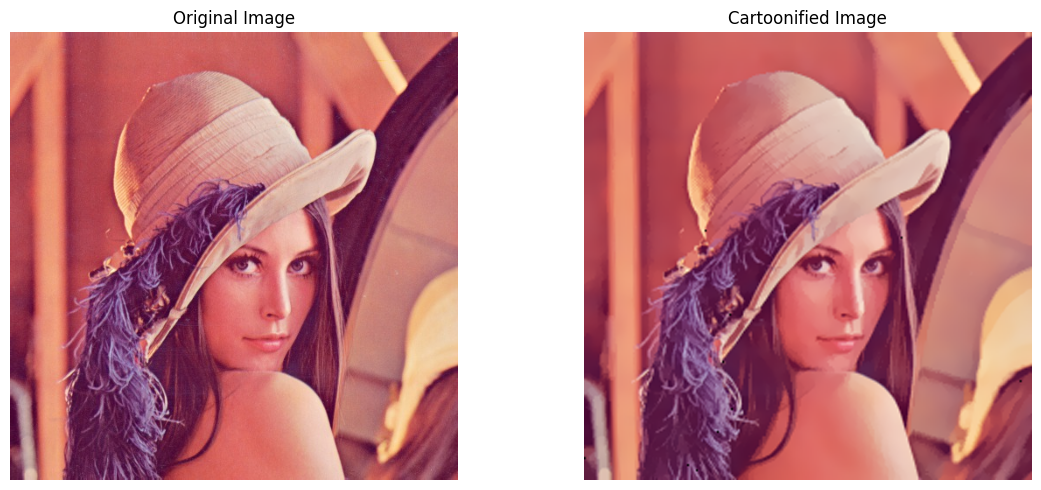

Cartoon saved to cartoon_output.jpg


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class NotebookCartoonifier:
    def __init__(self, image_path):
        """Initialize with image path."""
        self.image_path = "lena.png"
        self.image = None
        self.cartoon = None
        
    def load_image(self):
        """Load the image with error handling."""
        try:
            self.image = cv2.imread(self.image_path)
            if self.image is None:
                raise ValueError(f"Failed to load image from {self.image_path}. Check path and format.")
            print("Image loaded successfully!")
            return True
        except Exception as e:
            print(f"Error: {str(e)}")
            return False

    def cartoonify(self, downscale_factor=2, bilateral_d=7, sigma_color=10, 
                  sigma_space=10, edge_threshold1=60, edge_threshold2=120):
        """
        Convert loaded image to cartoon style with adjusted edge handling.
        """
        if self.image is None:
            print("No image loaded. Call load_image() first.")
            return False

        try:
            # Get original dimensions
            height, width = self.image.shape[:2]
            
            # Downscale for processing
            small_img = cv2.resize(self.image, 
                                 (width // downscale_factor, height // downscale_factor),
                                 interpolation=cv2.INTER_AREA)

            # Bilateral filter for smooth colors
            num_bilateral = 3
            color_filtered = small_img.copy()
            for _ in range(num_bilateral):
                color_filtered = cv2.bilateralFilter(
                    color_filtered,
                    d=bilateral_d,
                    sigmaColor=sigma_color,
                    sigmaSpace=sigma_space
                )

            # Edge detection
            gray = cv2.cvtColor(small_img, cv2.COLOR_BGR2GRAY)
            gray_blur = cv2.medianBlur(gray, 5)  # Reduced kernel size for finer edges
            edges = cv2.Canny(gray_blur, edge_threshold1, edge_threshold2)
            
            # Invert and dilate edges (white background, black lines)
            edges = cv2.bitwise_not(edges)  # Invert so edges are black on white
            edges = cv2.dilate(edges, np.ones((2,2), np.uint8), iterations=1)  # Thinner edges
            
            # Resize edges to match color image
            edges = cv2.resize(edges, (color_filtered.shape[1], color_filtered.shape[0]),
                             interpolation=cv2.INTER_LINEAR)
            edges_3ch = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
            
            # Combine: Use edges as mask to keep colors where edges aren't black
            self.cartoon = np.where(edges_3ch == 255, color_filtered, edges_3ch)
            self.cartoon = cv2.resize(self.cartoon, (width, height),
                                    interpolation=cv2.INTER_CUBIC)
            
            print("Cartoonification complete!")
            return True
        except Exception as e:
            print(f"Error during cartoonification: {str(e)}")
            return False

    def display_results(self):
        """Display original and cartoon images side by side."""
        if self.image is None or self.cartoon is None:
            print("Images not ready. Load and cartoonify first.")
            return

        # Convert BGR to RGB for matplotlib
        original_rgb = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        cartoon_rgb = cv2.cvtColor(self.cartoon, cv2.COLOR_BGR2RGB)

        # Create side-by-side plot
        plt.figure(figsize=(12, 5))
        
        plt.subplot(121)
        plt.imshow(original_rgb)
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(cartoon_rgb)
        plt.title('Cartoonified Image')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

    def save_cartoon(self, output_path="cartoon_output.jpg"):
        """Save the cartoonified image."""
        if self.cartoon is None:
            print("No cartoon image to save. Run cartoonify() first.")
            return False
        try:
            cv2.imwrite(output_path, self.cartoon)
            print(f"Cartoon saved to {output_path}")
            return True
        except Exception as e:
            print(f"Error saving image: {str(e)}")
            return False

# Example usage
def process_image(image_path):
    cartoonifier = NotebookCartoonifier(image_path)
    if cartoonifier.load_image():
        if cartoonifier.cartoonify():
            cartoonifier.display_results()
            cartoonifier.save_cartoon()

# Replace with your image path
process_image('path/to/your/image.jpg')

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class NotebookCartoonifier:
    def __init__(self, image_path):
        """Initialize with image path."""
        self.image_path ="hero_maicha.png"
        self.image = None
        self.cartoon = None
        
    def load_image(self):
        """Load the image with error handling."""
        try:
            self.image = cv2.imread(self.image_path)
            if self.image is None:
                raise ValueError(f"Failed to load image from {self.image_path}. Check path and format.")
            print("Image loaded successfully!")
            return True
        except Exception as e:
            print(f"Error: {str(e)}")
            return False

    def cartoonify(self, downscale_factor=2, bilateral_d=9, sigma_color=15, 
                  sigma_space=15, edge_threshold1=50, edge_threshold2=100):
        """
        Enhanced cartoonification with stronger smoothing and bolder edges.
        """
        if self.image is None:
            print("No image loaded. Call load_image() first.")
            return False

        try:
            # Get original dimensions
            height, width = self.image.shape[:2]
            
            # Downscale for processing
            small_img = cv2.resize(self.image, 
                                 (width // downscale_factor, height // downscale_factor),
                                 interpolation=cv2.INTER_AREA)

            # Stronger bilateral filter for smoother colors
            num_bilateral = 5  # More iterations
            color_filtered = small_img.copy()
            for _ in range(num_bilateral):
                color_filtered = cv2.bilateralFilter(
                    color_filtered,
                    d=bilateral_d,
                    sigmaColor=sigma_color,  # Increased for more smoothing
                    sigmaSpace=sigma_space   # Increased for broader effect
                )

            # Edge detection with bolder lines
            gray = cv2.cvtColor(small_img, cv2.COLOR_BGR2GRAY)
            gray_blur = cv2.medianBlur(gray, 5)
            edges = cv2.Canny(gray_blur, edge_threshold1, edge_threshold2)
            edges = cv2.dilate(edges, np.ones((3,3), np.uint8), iterations=2)  # Thicker edges
            edges = cv2.bitwise_not(edges)  # Invert: black lines, white background
            
            # Resize edges to match color image
            edges = cv2.resize(edges, (color_filtered.shape[1], color_filtered.shape[0]),
                             interpolation=cv2.INTER_LINEAR)
            edges_3ch = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
            
            # Combine with stronger cartoon effect
            self.cartoon = np.where(edges_3ch == 255, color_filtered, 0)  # Black edges, colored regions
            self.cartoon = cv2.resize(self.cartoon, (width, height),
                                    interpolation=cv2.INTER_CUBIC)
            
            print("Cartoonification complete!")
            return True
        except Exception as e:
            print(f"Error during cartoonification: {str(e)}")
            return False

    def display_results(self):
        """Display original and cartoon images side by side."""
        if self.image is None or self.cartoon is None:
            print("Images not ready. Load and cartoonify first.")
            return

        # Convert BGR to RGB for matplotlib
        original_rgb = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        cartoon_rgb = cv2.cvtColor(self.cartoon, cv2.COLOR_BGR2RGB)

        # Create side-by-side plot
        plt.figure(figsize=(12, 5))
        
        plt.subplot(121)
        plt.imshow(original_rgb)
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(cartoon_rgb)
        plt.title('Cartoonified Image')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

    def save_cartoon(self, output_path="cartoon_output.jpg"):
        """Save the cartoonified image."""
        if self.cartoon is None:
            print("No cartoon image to save. Run cartoonify() first.")
            return False
        try:
            cv2.imwrite(output_path, self.cartoon)
            print(f"Cartoon saved to {output_path}")
            return True
        except Exception as e:
            print(f"Error saving image: {str(e)}")
            return False

# Optional: Add color quantization for extra cartoon effect
def quantize_colors(image, num_colors=8):
    """Reduce number of colors for a more cartoon-like effect."""
    # Convert to float32 for k-means
    pixels = np.float32(image.reshape(-1, 3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    _, labels, palette = cv2.kmeans(pixels, num_colors, None, criteria, 10, flags)
    quantized = palette[labels.flatten()].reshape(image.shape)
    return quantized.astype(np.uint8)

# Example usage with optional quantization
def process_image(image_path, use_quantization=False):
    cartoonifier = NotebookCartoonifier(image_path)
    if cartoonifier.load_image():
        if cartoonify():
            if use_quantization:
                cartoonifier.cartoon = quantize_colors(cartoonifier.cartoon, num_colors=8)
            cartoonifier.display_results()
            cartoonifier.save_cartoon()

# Replace with your image path
process_image('path/to/your/image.jpg', use_quantization=True)  # Set to False to skip quantization

Image loaded successfully!


TypeError: cartoonify() missing 1 required positional argument: 'image_path'

Image loaded successfully!
Cartoonification complete!


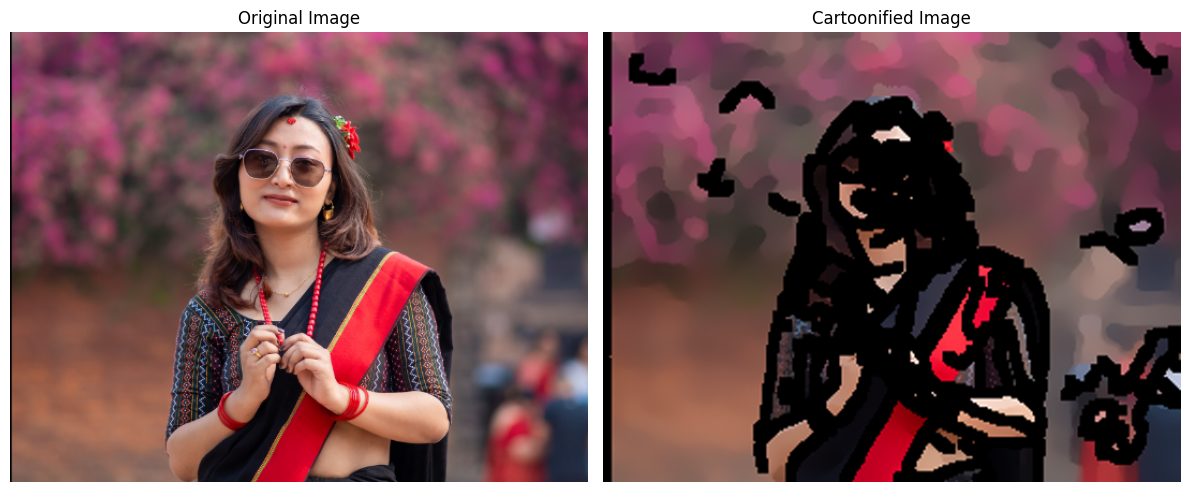

Cartoon saved to cartoon_output.jpg


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class NotebookCartoonifier:
    def __init__(self, image_path):
        """Initialize with image path."""
        self.image_path = image_path
        self.image = None
        self.cartoon = None
        
    def load_image(self):
        """Load the image with error handling."""
        try:
            self.image = cv2.imread(self.image_path)
            if self.image is None:
                raise ValueError(f"Failed to load image from {self.image_path}. Check path and format.")
            print("Image loaded successfully!")
            return True
        except Exception as e:
            print(f"Error: {str(e)}")
            return False

    def cartoonify(self, downscale_factor=2, bilateral_d=9, sigma_color=15, 
                  sigma_space=15, edge_threshold1=50, edge_threshold2=100):
        """
        Enhanced cartoonification with stronger smoothing and bolder edges.
        """
        if self.image is None:
            print("No image loaded. Call load_image() first.")
            return False

        try:
            # Get original dimensions
            height, width = self.image.shape[:2]
            
            # Downscale for processing
            small_img = cv2.resize(self.image, 
                                 (width // downscale_factor, height // downscale_factor),
                                 interpolation=cv2.INTER_AREA)

            # Stronger bilateral filter for smoother colors
            num_bilateral = 5
            color_filtered = small_img.copy()
            for _ in range(num_bilateral):
                color_filtered = cv2.bilateralFilter(
                    color_filtered,
                    d=bilateral_d,
                    sigmaColor=sigma_color,
                    sigmaSpace=sigma_space
                )

            # Edge detection with bolder lines
            gray = cv2.cvtColor(small_img, cv2.COLOR_BGR2GRAY)
            gray_blur = cv2.medianBlur(gray, 5)
            edges = cv2.Canny(gray_blur, edge_threshold1, edge_threshold2)
            edges = cv2.dilate(edges, np.ones((3,3), np.uint8), iterations=2)
            edges = cv2.bitwise_not(edges)  # Invert: black lines, white background
            
            # Resize edges to match color image
            edges = cv2.resize(edges, (color_filtered.shape[1], color_filtered.shape[0]),
                             interpolation=cv2.INTER_LINEAR)
            edges_3ch = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
            
            # Combine with stronger cartoon effect
            self.cartoon = np.where(edges_3ch == 255, color_filtered, 0)
            self.cartoon = cv2.resize(self.cartoon, (width, height),
                                    interpolation=cv2.INTER_CUBIC)
            
            print("Cartoonification complete!")
            return True
        except Exception as e:
            print(f"Error during cartoonification: {str(e)}")
            return False

    def display_results(self):
        """Display original and cartoon images side by side."""
        if self.image is None or self.cartoon is None:
            print("Images not ready. Load and cartoonify first.")
            return

        # Convert BGR to RGB for matplotlib
        original_rgb = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        cartoon_rgb = cv2.cvtColor(self.cartoon, cv2.COLOR_BGR2RGB)

        # Create side-by-side plot
        plt.figure(figsize=(12, 5))
        
        plt.subplot(121)
        plt.imshow(original_rgb)
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(cartoon_rgb)
        plt.title('Cartoonified Image')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

    def save_cartoon(self, output_path="cartoon_output.jpg"):
        """Save the cartoonified image."""
        if self.cartoon is None:
            print("No cartoon image to save. Run cartoonify() first.")
            return False
        try:
            cv2.imwrite(output_path, self.cartoon)
            print(f"Cartoon saved to {output_path}")
            return True
        except Exception as e:
            print(f"Error saving image: {str(e)}")
            return False

# Function to process the image
def process_image(image_path="hero_maicha.png"):  # Default path set to your image
    cartoonifier = NotebookCartoonifier(image_path)
    if cartoonifier.load_image():
        if cartoonifier.cartoonify():  # Fixed: Call the method directly
            cartoonifier.display_results()
            cartoonifier.save_cartoon()

# Run with your image path
process_image("hero_maicha.png")  # Explicitly using your provided path

Image loaded successfully!
Cartoonification complete!


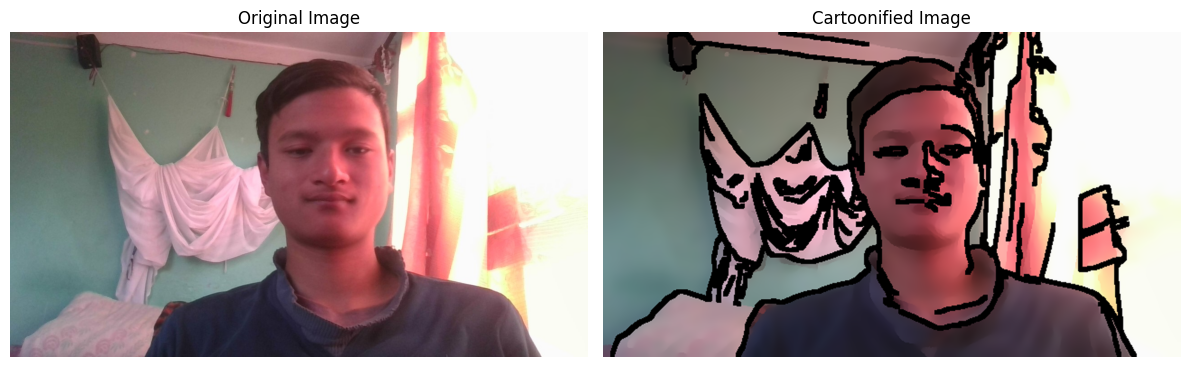

Cartoon saved to cartoon_output.jpg


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class NotebookCartoonifier:
    def __init__(self, image_path):
        """Initialize with image path."""
        self.image_path = image_path
        self.image = None
        self.cartoon = None
        
    def load_image(self):
        """Load the image with error handling."""
        try:
            self.image = cv2.imread(self.image_path)
            if self.image is None:
                raise ValueError(f"Failed to load image from {self.image_path}. Check path and format.")
            print("Image loaded successfully!")
            return True
        except Exception as e:
            print(f"Error: {str(e)}")
            return False

    def cartoonify(self, downscale_factor=2, bilateral_d=9, sigma_color=15, 
                  sigma_space=15, edge_threshold1=50, edge_threshold2=100):
        """
        Enhanced cartoonification with stronger smoothing and bolder edges.
        """
        if self.image is None:
            print("No image loaded. Call load_image() first.")
            return False

        try:
            # Get original dimensions
            height, width = self.image.shape[:2]
            
            # Downscale for processing
            small_img = cv2.resize(self.image, 
                                 (width // downscale_factor, height // downscale_factor),
                                 interpolation=cv2.INTER_AREA)

            # Stronger bilateral filter for smoother colors
            num_bilateral = 5
            color_filtered = small_img.copy()
            for _ in range(num_bilateral):
                color_filtered = cv2.bilateralFilter(
                    color_filtered,
                    d=bilateral_d,
                    sigmaColor=sigma_color,
                    sigmaSpace=sigma_space
                )

            # Edge detection with bolder lines
            gray = cv2.cvtColor(small_img, cv2.COLOR_BGR2GRAY)
            gray_blur = cv2.medianBlur(gray, 5)
            edges = cv2.Canny(gray_blur, edge_threshold1, edge_threshold2)
            edges = cv2.dilate(edges, np.ones((3,3), np.uint8), iterations=2)
            edges = cv2.bitwise_not(edges)  # Invert: black lines, white background
            
            # Resize edges to match color image
            edges = cv2.resize(edges, (color_filtered.shape[1], color_filtered.shape[0]),
                             interpolation=cv2.INTER_LINEAR)
            edges_3ch = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
            
            # Combine with stronger cartoon effect
            self.cartoon = np.where(edges_3ch == 255, color_filtered, 0)
            self.cartoon = cv2.resize(self.cartoon, (width, height),
                                    interpolation=cv2.INTER_CUBIC)
            
            print("Cartoonification complete!")
            return True
        except Exception as e:
            print(f"Error during cartoonification: {str(e)}")
            return False

    def display_results(self):
        """Display original and cartoon images side by side."""
        if self.image is None or self.cartoon is None:
            print("Images not ready. Load and cartoonify first.")
            return

        # Convert BGR to RGB for matplotlib
        original_rgb = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        cartoon_rgb = cv2.cvtColor(self.cartoon, cv2.COLOR_BGR2RGB)

        # Create side-by-side plot
        plt.figure(figsize=(12, 5))
        
        plt.subplot(121)
        plt.imshow(original_rgb)
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(cartoon_rgb)
        plt.title('Cartoonified Image')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

    def save_cartoon(self, output_path="cartoon_output.jpg"):
        """Save the cartoonified image."""
        if self.cartoon is None:
            print("No cartoon image to save. Run cartoonify() first.")
            return False
        try:
            cv2.imwrite(output_path, self.cartoon)
            print(f"Cartoon saved to {output_path}")
            return True
        except Exception as e:
            print(f"Error saving image: {str(e)}")
            return False

# Function to process the image
def process_image(image_path="prince.jpg"):  # Default path set to your image
    cartoonifier = NotebookCartoonifier(image_path)
    if cartoonifier.load_image():
        if cartoonifier.cartoonify():  # Fixed: Call the method directly
            cartoonifier.display_results()
            cartoonifier.save_cartoon()

# Run with your image path
process_image("prince.jpg")  # Explicitly using your provided path